In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath('../src')
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
import matplotlib.pyplot as plt
from detector import Detector
from simulator import simulate_ts
%reload_ext autoreload

#### Simulate Data

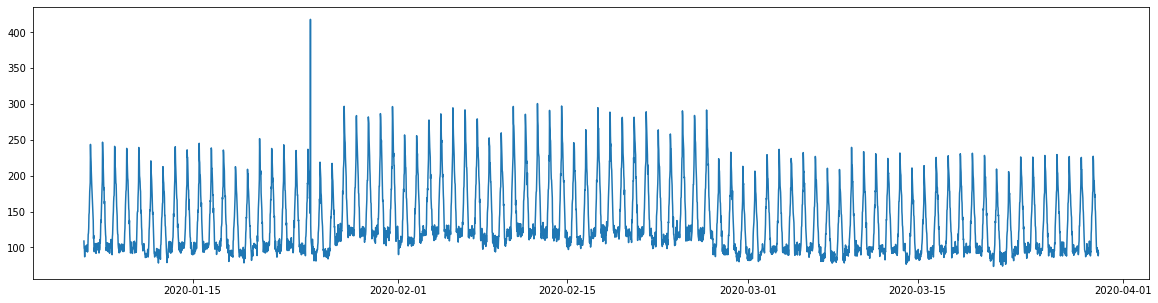

In [2]:
df = simulate_ts(
    freq='30min',
    changepoint_indexes=[1000, 2500],
    changepoint_directions=['up', 'down'],
    level_shift=0.2,
    weekend_ratio=0.9,
)

df.iloc[900] = df.iloc[900] * 3 # introduce anomaly

plt.figure(figsize=(20,5))
plt.plot(df)

#### Run Change Point Detector
Notice that the anomaly is not flagged out as a changepoint. This is because the detector looks for sustained changes rather than instantaneous ones. Furthermore, anomalies are replaced with the median of the respective timestamp in the preprocessing step.

100%|██████████| 57/57 [00:05<00:00,  9.51it/s]


Number of changepoints: 2
Number of missing gaps: 0


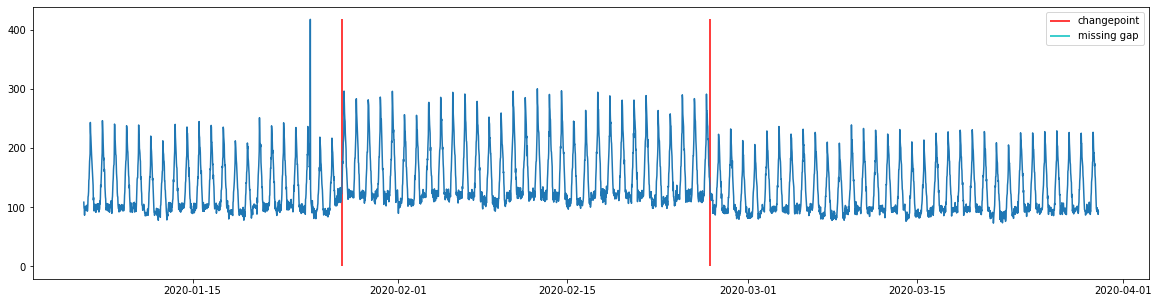

In [3]:
detector = Detector(magnitude_quantile_direction='any')
changepoints = detector.fit_predict(df)
detector.plot_changepoints()

#### See test results of detected changepoints

In [4]:
detector.generate_test_results()

,changepoint,scan_window_start,scan_window_end,passed_all_tests,duplicate,missing_gap,direction,n_day_rule,llr_pvalue_7d,llr_pvalue_backward,llr_pvalue_forward,mag_test_value,perc_change_7d,perc_change_backward,perc_change_forward,perc_change_hist_buffer,abs_change_7d,abs_change_backward,abs_change_forward
0,2020-01-27 09:00:00,2020-01-23,2020-01-29 23:30:00,True,False,False,up,Pass,5.748502e-11,3.812479e-05,1.187914e-06,1.000,0.187321,0.204461,0.175227,0.201170,24.138586,27.716424,21.898440
1,2020-02-26 20:30:00,2020-02-23,2020-02-29 23:30:00,True,False,False,down,Pass,5.551115e-16,3.625907e-07,1.861392e-09,0.875,0.193095,0.185986,0.198165,0.198706,29.504458,27.993776,30.670766


#### Plot a singe rolling window
The green lines indicate the start and end of the scan window, and the red line indicates the changepoint which was detected in this rolling window. Based on the printed test results, this changepoint passes all the condition checks and is therefore flagged as a final changepoint in the main plot above. Notice that the anomaly is flagged as an outlier and treated via replacement with median, giving rise to the different before and after data preprocessing plots.

Changepoint: 2020-01-27 09:00:00
Missing gap: False
n_day_rule: Pass
direction: up
llr_7d: 5.748501674673889e-11 (Pass)
llr_backward: 3.812478926645824e-05 (Pass)
llr_forward: 1.1879144671267383e-06 (Pass)
relative_change_7d: 0.18732118057643246 (Pass)
relative_change_backward: 0.20446092264340276 (Pass)
relative_change_forward: 0.1752267853484697 (Pass)
relative_change_hist_buffer 0.20117023276785556 (Pass)
absolute_change_7d: 24.1385857392535 (Pass)
absolute_change_backward: 27.716424164982044 (Pass)
absolute_change_forward: 21.898439692675268 (Pass)
magnitude_test: 1.0 (Pass)
duplicate: False


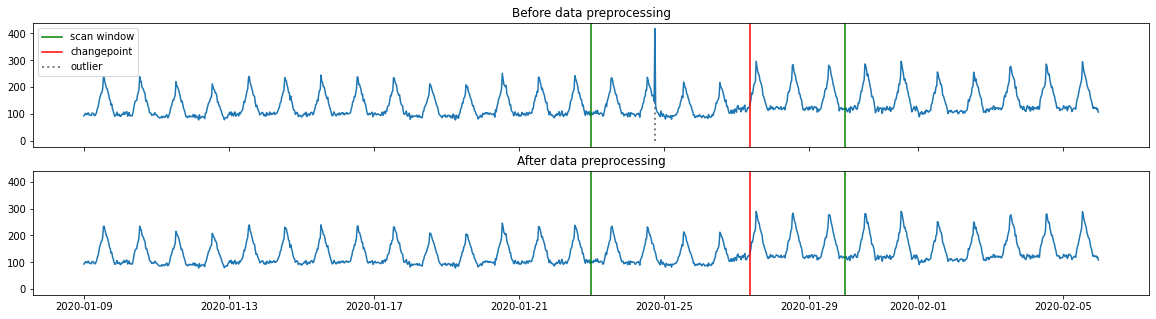

In [5]:
detector.plot_rolling_window('2020-01-23')